In [ ]:
''' load dataset from sklearn '''
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1(shuffle=True)# change arrangment of sample randomly 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import scipy.sparse
import random
import tensorflow as tf


In [ ]:
data = rcv1.data
target = rcv1.target

data = data[0:20,:]
target = target[0:20,:]

data = data.toarray()
target = target.toarray()


In [ ]:
class SOM:
  def __init__(self,map_size,lr=0.01):
    '''
    param map_size: [map_w,map_h,f=103]
    '''
    self.map = np.zeros(shape=(map_size[0],map_size[1],map_size[2]))
    self.lr0 = lr
    self.lr = self.lr0 # learning rate
    self.R0 = map_size[0]/2
    self.R=self.R0 #radius

  def train(self,X,T=1000, error_threshold = 10**-20):
    Js = []
    for t in range(T):
      prev_map =self.map
      for i in range(X.shape[0]):
        x=X[i,:]
        #print("A\n")
        winner = self.find_winner(x) #winner = [5,23]
        #print("B\n")
        NS = self.get_neighborhood_strength(winner)
        updated_weights =  self.updata_weights(x,NS,len(X))
      

      self.lr = self.lr0*(1-t/T)
      self.R = self.R0*(1-t/T)
      Js.append(np.linalg.norm(prev_map - self.map))

      print("iteration: %d, LR: %.6f, R: %.6f, J: %.6f" %(t,self.lr,self.R,Js[-1]))
      if Js[-1] < error_threshold:
        print("MIN CHANGE")
        break

    return Js,updated_weights

  def visualize(self,X,y):
    self.scores = np.zeros(shape=(self.map.shape[0],self.map.shape[1],3))#3 is for RGB color
    for i in range(X):
      winner = self.find_winner(X)
      iw,jw = winner[0],winner[1]


  def find_winner(self,x):
    repeated_x = np.tile(x,[  self.map.shape[0],self.map.shape[1] ,1 ])
    dists = np.sum(np.abs(self.map-repeated_x),axis =2)
    #dists = np.sum((self.map-repeated_x)**2,axis =2)
    winner = np.unravel_index(np.argmin(dists, axis=None),dists.shape)

    return winner

  def get_neighborhood_strength(self,winner):
    net_mask = np.zeros(shape=(self.map.shape[0],self.map.shape[1]))

    iw,jw = winner[0],winner[1]
    net_mask[iw, jw]=1

    R = int(self.R)
    for ri in range(-R,R):
      for rj in range(-R,R):
        if (0 <= iw+ri <self.map.shape[0]) and (0<=jw+rj < self.map.shape[1]):
          net_mask[iw+ri,jw+rj]=0 if np.sqrt(ri**2 + rj**2) >R else 1/(1 + np.sqrt(ri**2 + rj**2) )

    # for r in range(1,int(self.R)):
    #   if iw-r>=0:
    #     net_mask[iw-r,jw] = 1/r
    #   if iw+r <self.map.shape[0] - 1:
    #     net_mask[iw+r,jw] = 1/r

    #   if jw-r>0:
    #     net_mask[iw,jw-r] = 1/r
    #   if jw+r <self.map.shape[1] - 1:
    #     net_mask[iw,jw+r] = 1/r
    
    return net_mask

  def updata_weights(self,x,net_strength,X_len):
      neighborhood_strength = np.tile(net_strength,[self.map.shape[2],1 ,1 ]).transpose()

      repeated_x = np.tile(x,[  self.map.shape[ 0],self.map.shape[1] ,1 ])
      Delta = repeated_x-self.map

      self.map = self.map + (self.lr/X_len) * np.multiply(neighborhood_strength,Delta)
      
      return self.map

    

In [ ]:
som_net = SOM(map_size = [30,30,data.shape[1]])
Js = som_net.train(data,100)
plt.plot(Js)
plt.show()


**SVD**

In [ ]:
!pip install git+https://github.com/beringresearch/ivis

In [ ]:
ivis = Ivis(model='maaten', n_epochs_without_progress=5)
ivis.fit(X1)

79/79 [==============================] - 1s 12ms/step


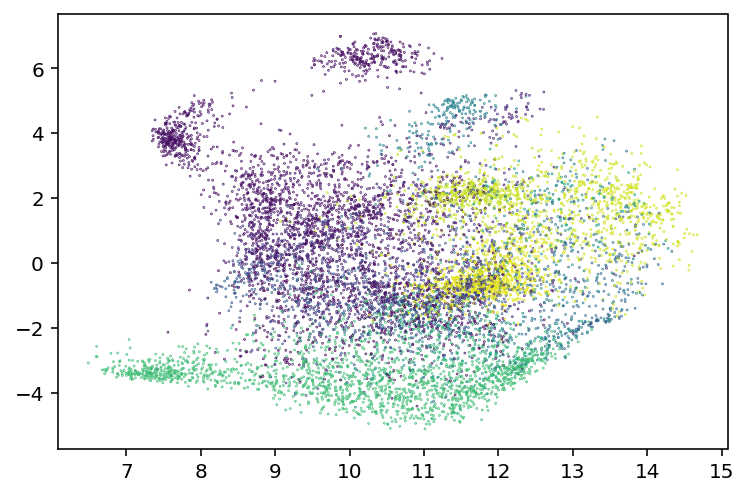

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
embeddings = ivis.transform(X1)
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=0.1, c=np.argmax(y1.toarray(), axis=1))

the dimension of data is 47263. the matrix of data is space that it means the matrix have many zeros so we use singular-value decomposition approac (svd) to reduce dimension to 150 

In [ ]:
print("data dimention: "+str(rcv1.data.shape[1]))
print("data dimention after trunced SVD:"+str(X1.shape[1]))
print("data dimention after trunced SVD  and IVIS:"+str(embeddings.shape[1]))

data dimention: 47236
data dimention after trunced SVD:150
data dimention after trunced SVD  and IVIS:2


# **Truncated SVD**

In [ ]:
from ivis import Ivis
from sklearn.utils import resample
from sklearn.decomposition import TruncatedSVD
N_SAMPLES = 10000 
X1, y1 = resample(rcv1.data, rcv1.target, replace=False,
                n_samples=N_SAMPLES, random_state=1234)
X1 = TruncatedSVD(n_components=150).fit_transform(X1)


In [ ]:
# X1, y1
som_net = SOM(map_size = [20,20,X1.shape[1]],lr=0.1)
Js,weights = som_net.train(X1,500)

iteration: 0, LR: 0.100000, R: 10.000000, J: 0.027322
iteration: 1, LR: 0.090000, R: 9.000000, J: 0.028805
iteration: 2, LR: 0.080000, R: 8.000000, J: 0.024744
iteration: 3, LR: 0.070000, R: 7.000000, J: 0.020618
iteration: 4, LR: 0.060000, R: 6.000000, J: 0.016879
iteration: 5, LR: 0.050000, R: 5.000000, J: 0.013579
iteration: 6, LR: 0.040000, R: 4.000000, J: 0.010462
iteration: 7, LR: 0.030000, R: 3.000000, J: 0.007537
iteration: 8, LR: 0.020000, R: 2.000000, J: 0.004982
iteration: 9, LR: 0.010000, R: 1.000000, J: 0.001820


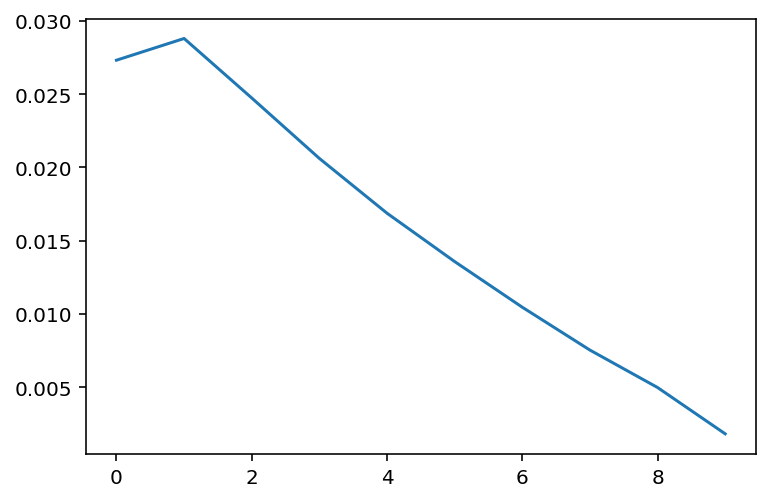

In [ ]:
plt.plot(Js)
plt.show()

In [ ]:
!pip3 install susi

In [ ]:

N_SAMPLES = 10000 
X1, y1 = resample(rcv1.data, rcv1.target, replace=False,
                n_samples=N_SAMPLES, random_state=1234)
#X1 = TruncatedSVD(n_components=1500).fit_transform(X1)

In [ ]:
X1.shape

(10000, 47236)

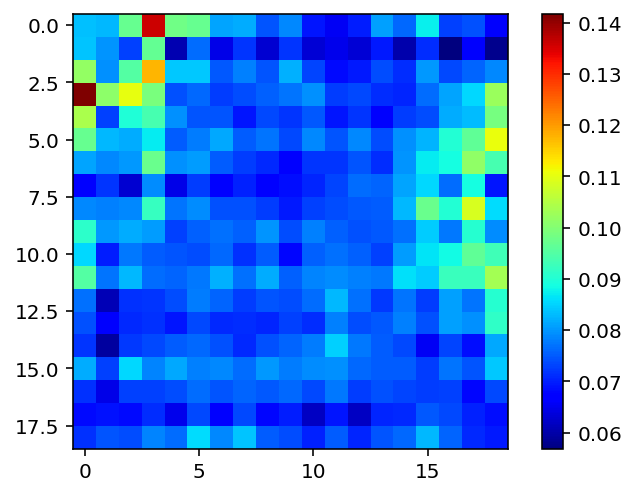

In [ ]:
import susi
import matplotlib.pyplot as plt

# initialize and fit SOM
som = susi.SOMClustering()
som.fit(X1.toarray())

u_matrix = som.get_u_matrix()
plt.imshow(np.squeeze(u_matrix), cmap="jet")
plt.colorbar()
plt.show()


In [ ]:
clusters[0]

NameError: ignored